In [ ]:
# Bayesian Machine Learning | Carnegie Mellon University | Homework 5 | 04 April 2020 | Sergiu Iliev
import pandas as pd
import numpy as np
import math as m

from scipy import stats          # statisics Python package
import statsmodels.api as sm     # statsmodels is a complement to scipy for descriptive statistics models
                                 # Documentation https://www.statsmodels.org/stable/
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestRegressor as RandomForest # Import Random Forrest Package

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation    
    
import matplotlib.pyplot as plt  # plotting library
import seaborn as sns

import warnings                  # ignore warnings 
warnings.simplefilter('ignore')

%matplotlib inline

# Ensemble Methods

## (a) Bias and Variance evaluation for a Weak Learner (Decision Tree)

The Friedman-Silverman function of the 10-dimension unit hypercube is given as:

$$f(x) = 0.1 exp[4x_1] + \frac{1}{1+exp[-20(x_2-0.5)]} + 3x_3 + 2x_4 + x_5$$

**Note** Using this expression we can create a test & training dataset for a weak learner. The learner will be given as input the full 10 dimension input space and will output the function value. The function function above only takes in the first 5 dimensions as the rest are not affecting the function value. Therefore, the extra 5 dimensions do no have predictive power on the learner and are a good test of its robustness to noise. 

References used on hypercubes: [1](https://www.wikiwand.com/en/Hypercube_internetwork_topology), [2](https://www.wikiwand.com/en/Hypercube), [3](https://www.youtube.com/watch?v=iGO12Z5Lw8s)

**Generating Test and Train Datasets**

In [ ]:
# Generate the 10 dimension INPUT vector field
gen_len = 1024                     # define the length of the input vectors to be generated
np.random.seed(1)                  # define a random seed to be consisted across experiments
x_np = np.random.rand(gen_len,10)  # generate 10 input vectors of the legth specified (from 0 to 1) 
x_np = np.round(x_np)              # reduce to unit hypercube (0 to 1)
x = pd.DataFrame(x_np)             # convert this array into a dataframe for easy visualisation
x.columns = np.arange(1, 11)       # rename the columns so that the first column, x1 has the label 1
x.head(5)

,1,2,3,4,5,6,7,8,9,10
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
4,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# Generate the function values for the input vector using the Friedman-Silverman Function
y = 0.1 * np.exp(4 * x[1])  +  1 / (1 + np.exp(-20 * (x[2] - 0.5)))  +  3*x[3]  +  2*x[4]  +  x[5]
y.head(5)

0    1.099955
1    3.099955
2    9.459770
3    6.100045
4    8.459770
dtype: float64

In [ ]:
# Split the data into test and train series
x_train, x_test, y_train, y_test = train_test_split(x.loc[:, :], # select the all of the x vectors, not just 1 to 5
                                                    y, test_size=0.3, random_state=1) # 70% training and 30% test

**Decision Tree Algorithm** 
![Decision Tree Algorith](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934190/2_btay8n.png)

**Building a Decision Tree Model**

References used: [1](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py), [2](https://scikit-learn.org/stable/auto_examples/ensemble/plot_bias_variance.html#sphx-glr-auto-examples-ensemble-plot-bias-variance-py)

In [ ]:
# Define our Decision Tree Regression Function
def dt_regressor(x_train, x_test, y_train, max_depth=None, visualise=False):
    # Create Decision Tree classifer object
    # reference: https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
    dt = DecisionTreeRegressor(max_depth=max_depth) # max_depth of None means the tree is fully grown

    # Train Decision Tree Classifer
    dt =dt.fit(x_train,y_train)

    #Predict the response for test dataset
    y_pred = dt.predict(x_test)
    
    if visualise:
        # Plot the results for the first dimension
        plt.figure()
        plt.scatter(x[1], y, s=20, edgecolor="black", c="darkorange", label="data")
        plt.plot(x_test[1], y_pred, color="cornflowerblue", label='max_depth=' + str(max_depth), linewidth=2)
        plt.xlabel("x1")
        plt.ylabel("f(x)")
        plt.title("Decision Tree Regression (1 Dimension Cut)")
        plt.legend()
        plt.show()
        
    return y_pred

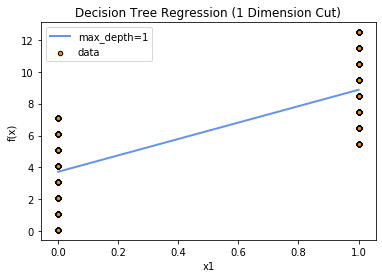

array([3.73259192, 3.73259192, 3.73259192, 3.73259192, 8.86659313,
       3.73259192, 3.73259192, 8.86659313, 8.86659313, 3.73259192,
       8.86659313, 3.73259192, 3.73259192, 3.73259192, 8.86659313,
       3.73259192, 3.73259192, 3.73259192, 8.86659313, 8.86659313,
       3.73259192, 8.86659313, 8.86659313, 3.73259192, 8.86659313,
       8.86659313, 8.86659313, 8.86659313, 8.86659313, 3.73259192,
       3.73259192, 3.73259192, 3.73259192, 8.86659313, 8.86659313,
       3.73259192, 8.86659313, 8.86659313, 3.73259192, 3.73259192,
       8.86659313, 3.73259192, 3.73259192, 8.86659313, 3.73259192,
       3.73259192, 8.86659313, 8.86659313, 8.86659313, 8.86659313,
       3.73259192, 3.73259192, 8.86659313, 3.73259192, 8.86659313,
       8.86659313, 3.73259192, 8.86659313, 8.86659313, 8.86659313,
       8.86659313, 8.86659313, 3.73259192, 8.86659313, 3.73259192,
       8.86659313, 8.86659313, 8.86659313, 3.73259192, 3.73259192,
       3.73259192, 3.73259192, 3.73259192, 3.73259192, 3.73259

In [ ]:
dt_regressor(x_train, x_test, y_train, max_depth=1, visualise=True)

**Checking the Decision Tree bias and variance for various depths** 

In [ ]:
# Max depth of 1 (tree stump)
y_pred = dt_regressor(x_train, x_test, y_train, max_depth=1, visualise=False)

y_bias = (y_test - y_pred) ** 2          # bias = the squared error
# NB the expectancy for y_pred at row 1 is y_pred since y is 1D. In other words, mean(y_pred, axis=0) = y_pred
y_var = np.var(y_pred)                   # variance of the the decision tree predictor 
print("Results: {0:.4f} (bias^2) {1:.4f} (var) = {2:.4f} (total error)".format(np.mean(y_bias), np.mean(y_var), 
                                                                               np.mean(y_bias) + np.mean(y_var)))

Results: 3.3881 (bias^2) 6.5559 (var) = 9.9440 (total error)


This is the most complext decision tree model, it has a high variance (since it overfits), but a low bias 

In [ ]:
# Max depth of 2 (Partly Grown Tree)
y_pred = dt_regressor(x_train, x_test, y_train, max_depth=2, visualise=False)

y_bias = (y_test - y_pred) ** 2          # bias = the squared error
y_var = np.var(y_pred)                   # variance of the the decision tree predictor 
print("Results: {0:.4f} (bias^2) {1:.4f} (var) = {2:.4f} (total error)".format(np.mean(y_bias), np.mean(y_var), 
                                                                               np.mean(y_bias) + np.mean(y_var)))

Results: 1.3680 (bias^2) 8.9555 (var) = 10.3236 (total error)


In [ ]:
# Max depth of None (Fully Grown Tree)
y_pred = dt_regressor(x_train, x_test, y_train, max_depth=None, visualise=False)

y_bias = (y_test - y_pred) ** 2          # bias = the squared error
y_var = np.var(y_pred)                   # variance of the the decision tree predictor 
print("Results: {0:.4f} (bias^2) {1:.4f} (var) = {2:.4f} (total error)".format(np.mean(y_bias), np.mean(y_var), 
                                                                               np.mean(y_bias) + np.mean(y_var)))

Results: 0.0000 (bias^2) 10.6415 (var) = 10.6415 (total error)


## (b) Ensemble Method Recommendation

Observations from the above model experiments

- The most complex Decision Tree Model (max_depth=0) overfits the data and thus it has a high variance, however it matches the test dataset well and thus it has a low bias
- In the case of complex trees, the noise in the data i.e. the features with no predictive power x6 to x10 are increasing error
- The simplest decision tree actually achieves the lowest total error, however it has a very high bias
- An ensamble method applied to the low complexity decision tree should improve accuracy (bias), hopefully keeping the same level of precision (variance)
- The following trade-off diagram (also discussed in the course visually displays this concept) [reference](https://towardsdatascience.com/random-forests-and-the-bias-variance-tradeoff-3b77fee339b4):
![Trade-off](https://miro.medium.com/max/984/1*kADA5Q4al9DRLoXck6_6Xw.png)
- What we would like, ideally, is low bias-low variance. 
- To achieve this we will build on the weak learner we are going to implement a Random Forrest ensemble method.

# (c) Ensemble Method Implementation (Random Forrest)

I will implement a **Bootstrap Variance analysis on a Random Forrest Regressor** on the weak learner decision tree from previously. Initially I used bagging, but decided to implement a random forrest for better results since the exercise proved more interesting this way.

References used: [1](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html#sklearn.ensemble.BaggingRegressor), [2](https://towardsdatascience.com/random-forests-and-the-bias-variance-tradeoff-3b77fee339b4), [3](https://en.wikipedia.org/wiki/Bessel%27s_correction), Lecture Notes

In [ ]:
# Instantiate the RandomForestRegressor
# e = RandomForest(n_estimators=10, max_depth=None)
# e.fit(x_train, y_train)   # train the model
# e.score(x_test, y_test)   # score it on your validation set

In [ ]:
# Define a Basic Bootstrap Variance Function on the Random Forrests from the previous week learner decision trees
# reference: lecture notes

# This will be defined as a function with various parameters since these will be used in the following points of the problem
def bbv_rf_ensemble_evaluation(x_train, 
                                x_test, 
                                y_train, 
                                n_trees=10,     # the number of models in the ensemble
                                max_depth=None, # the max depth of the weak learner decision trees, fully grown by default
                                ndim=10):       # how many features the models in the ensamble are considering, by default it considers all features including those with no predictive power
    
    # Instantiate the RandomForestRegressor
    rf = RandomForest(n_estimators=n_trees, max_depth=max_depth)
    
    # Train the model on the number of features specified
    train_data = x_train.iloc[:, 0:ndim]
    rf.fit(train_data, y_train)
    
    # Define the Test Dataset
    test_data = x_test.iloc[:,0:ndim]
    
    # Evaluate the ensemble (Random Forrest)
    rf.score(test_data, y_test)
        
    # Evaluate the individual models in the ensemble (Decision Trees) 
    # Generate a list of all of the individual weak learners in the ensemble on he unseen data
    predictions = [x.predict(test_data) for x in rf.estimators_]
    
    means = []
    variances = []
    for ensemble in predictions:
        means.append(np.mean(ensemble))
        variances.append(np.var(ensemble, ddof=1))
        # The average squared deviation is normally calculated as x.sum() / N, where N = len(x). 
        # If, however, ddof is specified, the divisor N - ddof is used instead. 
        # In standard statistics practice, ddof=1 provides an unbiased estimator of the variance of the infinite
        # population. ddof=0 provides a maximum likelihood estimate of the variance for normally distributed variables. 
        # The standard deviation computed in this function is the square root of the estimated variance,
        # so even with ddof=1, it will not be an unbiased estimate of the standard deviation per se.
        
    zscores = [x / y for x, y in zip(means, np.sqrt(variances))]
    
    MSE = np.sqrt(np.mean(np.square(means)))
    STD = np.sqrt(np.mean(variances))
    ZSCORE = np.mean(np.square(zscores))    
    
    print("Ensemble MSE (bias) = {}".format(MSE))
    print("Bootstrap std. dev (variance) = {}".format(STD))
    print("Mean square zscore = {}".format(ZSCORE))
    
    return MSE, STD, ZSCORE

In [ ]:
bbv_rf_ensemble_evaluation(x_train, x_test, y_train, n_trees=10, max_depth=None, ndim=10)

Ensemble MSE (bias) = 5.94887190493783
Bootstrap std. dev (variance) = 3.2674353202404203
Mean square zscore = 3.3147840182819586


(5.94887190493783, 3.2674353202404203, 3.3147840182819586)

# (d) Ensemble Performance Analysis

We note that the Random Forrest offers acceptable results that are better than the individual trees even for fully grown decision trees (which are high variance and susceptible to noise). The z-score indicates a statistically acceptable prediction confidence.

In [ ]:
bbv_rf_ensemble_evaluation(x_train, x_test, y_train, n_trees=1, max_depth=None, ndim=10)

Ensemble MSE (bias) = 5.94887190493783
Bootstrap std. dev (variance) = 3.2674353202404203
Mean square zscore = 3.3147840182819586


(5.94887190493783, 3.2674353202404203, 3.3147840182819586)

Significantly increasing the size of the ensable (from 10 to 10,000 decision trees) offers almost no reduction in MSE and an increase in the prediction confidence, however it takes order of magnitude longer to run. 

In [ ]:
bbv_rf_ensemble_evaluation(x_train, x_test, y_train, n_trees=10000, max_depth=None, ndim=10)

Ensemble MSE (bias) = 5.948872554583822
Bootstrap std. dev (variance) = 3.2674346519510142
Mean square zscore = 3.314786106753614


(5.948872554583822, 3.2674346519510142, 3.314786106753614)

# (e) Ensemble Hyperparameter Tuning


**Sensitivity analysis to forrest size**

In [ ]:
# Initiate list to store various ensemble performance parameters
n = 30
MSE=np.zeros(n)
STD=np.zeros(n)
ZSCORE=np.zeros(n)
test_range = np.arange(1,n+1)

# Carry out a sensitivity analysis for the random forrest size
for i, n_trees in enumerate(test_range):
    print('\nSensitivity parameter: number of trees in the random forrest = ', n_trees)
    (MSE[i], STD[i], ZSCORE[i]) = bbv_rf_ensemble_evaluation(
        x_train, x_test, y_train, n_trees=n_trees, max_depth=None, ndim=10)


Sensitivity parameter: number of trees in the random forrest =  1
Ensemble MSE (bias) = 5.94887190493783
Bootstrap std. dev (variance) = 3.26743532024042
Mean square zscore = 3.3147840182819595

Sensitivity parameter: number of trees in the random forrest =  2
Ensemble MSE (bias) = 5.94887190493783
Bootstrap std. dev (variance) = 3.26743532024042
Mean square zscore = 3.314784018281959

Sensitivity parameter: number of trees in the random forrest =  3
Ensemble MSE (bias) = 5.948871904937829
Bootstrap std. dev (variance) = 3.2674353202404203
Mean square zscore = 3.3147840182819586

Sensitivity parameter: number of trees in the random forrest =  4
Ensemble MSE (bias) = 5.948871904937829
Bootstrap std. dev (variance) = 3.26743532024042
Mean square zscore = 3.314784018281958

Sensitivity parameter: number of trees in the random forrest =  5
Ensemble MSE (bias) = 5.948871904937829
Bootstrap std. dev (variance) = 3.2674353202404203
Mean square zscore = 3.3147840182819586

Sensitivity paramet

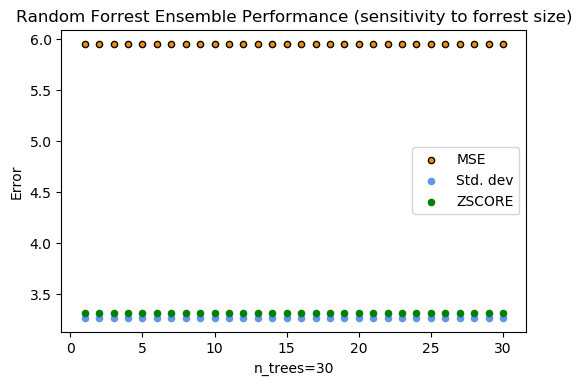

In [ ]:
# Plot the results
plt.figure(figsize=(6, 4), dpi=100)
plt.scatter(test_range, MSE, s=20, edgecolor="black", c="darkorange", label="MSE")
plt.scatter(test_range, STD, s=20, c="cornflowerblue", label='Std. dev')
plt.scatter(test_range, ZSCORE, s=20, c="green", label='ZSCORE')
plt.xlabel('n_trees=' + str(n_trees))
plt.ylabel('Error')
plt.title("Random Forrest Ensemble Performance (sensitivity to forrest size)")
plt.legend()
plt.show()

Therefore, the ensemble does not show any sensitivity to forrest size

In [ ]:
bbv_rf_ensemble_evaluation(x_train, x_test, y_train, n_trees=1, max_depth=None, ndim=10)

Ensemble MSE (bias) = 5.94887190493783
Bootstrap std. dev (variance) = 3.2674353202404203
Mean square zscore = 3.3147840182819586


(5.94887190493783, 3.2674353202404203, 3.3147840182819586)

**Sensitivity analysis to single model complexity (tree depth)**

In [ ]:
# Initiate list to store various ensemble performance parameters
n = 10
MSE=np.zeros(n)
STD=np.zeros(n)
ZSCORE=np.zeros(n)
test_range = np.arange(1,n+1)

# Carry out a sensitivity analysis for the random forrest size
for i, max_depth in enumerate(test_range):
    print('\nSensitivity parameter: depth of trees in the random forrest = ', max_depth)
    (MSE[i], STD[i], ZSCORE[i]) = bbv_rf_ensemble_evaluation(
        x_train, x_test, y_train, n_trees=10, max_depth=max_depth, ndim=10)


Sensitivity parameter: depth of trees in the random forrest =  1
Ensemble MSE (bias) = 6.106389514552453
Bootstrap std. dev (variance) = 2.554890536060541
Mean square zscore = 5.717426533769941

Sensitivity parameter: depth of trees in the random forrest =  2
Ensemble MSE (bias) = 5.962243163756084
Bootstrap std. dev (variance) = 3.01494663659385
Mean square zscore = 3.912507646692498

Sensitivity parameter: depth of trees in the random forrest =  3
Ensemble MSE (bias) = 5.985695836165216
Bootstrap std. dev (variance) = 3.1473932195514958
Mean square zscore = 3.6171229352504044

Sensitivity parameter: depth of trees in the random forrest =  4
Ensemble MSE (bias) = 5.99659792593658
Bootstrap std. dev (variance) = 3.205716501309791
Mean square zscore = 3.500853590698823

Sensitivity parameter: depth of trees in the random forrest =  5
Ensemble MSE (bias) = 5.94887190493783
Bootstrap std. dev (variance) = 3.2674353202404203
Mean square zscore = 3.3147840182819586

Sensitivity parameter: 

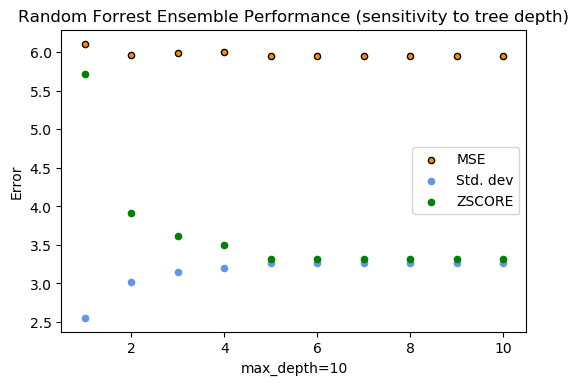

In [ ]:
# Plot the results
plt.figure(figsize=(6, 4), dpi=100)
plt.scatter(test_range, MSE, s=20, edgecolor="black", c="darkorange", label="MSE")
plt.scatter(test_range, STD, s=20, c="cornflowerblue", label='Std. dev')
plt.scatter(test_range, ZSCORE, s=20, c="green", label='ZSCORE')
plt.xlabel('max_depth=' + str(max_depth))
plt.ylabel('Error')
plt.title("Random Forrest Ensemble Performance (sensitivity to tree depth)")
plt.legend()
plt.show()

The forrest is sensitive to tree depth and an optimum is achieved at a depth over 5. 

Finally, another method to increase the accuracy of the ensemble would be to allow the exchange of information between the various decision trees within it. This would improve single model error, but it would increase correlation between models $\sqrt{\bar{\rho}}$ . As long as the improvement in single model error is greater it could prove an efficient method to increase accuracy and reduce.

**Sensitivity to the number of features (ndim)**

Since out of the 10 features of interest parsed only 5 are providing relevant information, it would be interesting to see the sensivity of the ensable to this parameter.

In [ ]:
# Initiate list to store various ensemble performance parameters
n = 10
MSE=np.zeros(n)
STD=np.zeros(n)
ZSCORE=np.zeros(n)
test_range = np.arange(1,n+1)

# Carry out a sensitivity analysis for the random forrest size
for i, ndim in enumerate(test_range):
    print('\nSensitivity parameter: number of features = ', ndim)
    (MSE[i], STD[i], ZSCORE[i]) = bbv_rf_ensemble_evaluation(
        x_train, x_test, y_train, n_trees=10, max_depth=1, ndim=ndim)


Sensitivity parameter: number of features =  1
Ensemble MSE (bias) = 6.131906538627389
Bootstrap std. dev (variance) = 2.5530541629441306
Mean square zscore = 5.782452055891142

Sensitivity parameter: number of features =  2
Ensemble MSE (bias) = 6.13397003552876
Bootstrap std. dev (variance) = 2.5321475842822436
Mean square zscore = 5.879566489466349

Sensitivity parameter: number of features =  3
Ensemble MSE (bias) = 6.089076406427704
Bootstrap std. dev (variance) = 2.595771301205456
Mean square zscore = 5.519848955552325

Sensitivity parameter: number of features =  4
Ensemble MSE (bias) = 6.103613241755419
Bootstrap std. dev (variance) = 2.5682185411383522
Mean square zscore = 5.6695474482739385

Sensitivity parameter: number of features =  5
Ensemble MSE (bias) = 6.1019953076712
Bootstrap std. dev (variance) = 2.5216787165674655
Mean square zscore = 5.8790489449722845

Sensitivity parameter: number of features =  6
Ensemble MSE (bias) = 6.092170092602257
Bootstrap std. dev (vari

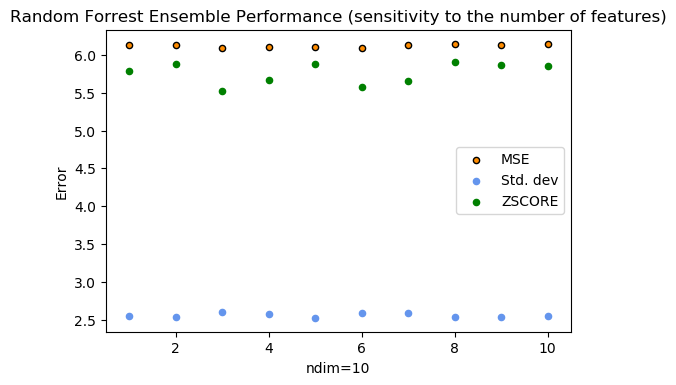

In [ ]:
# Plot the results
plt.figure(figsize=(6, 4), dpi=100)
plt.scatter(test_range, MSE, s=20, edgecolor="black", c="darkorange", label="MSE")
plt.scatter(test_range, STD, s=20, c="cornflowerblue", label='Std. dev')
plt.scatter(test_range, ZSCORE, s=20, c="green", label='ZSCORE')
plt.xlabel('ndim=' + str(ndim))
plt.ylabel('Error')
plt.title("Random Forrest Ensemble Performance (sensitivity to the number of features)")
plt.legend()
plt.show()

The ensemble performance fluctuates as it choses features that are predictors and features that are not. The graph changes on each run.

In [ ]:
# Export as PDF
# !apt-get install texlive texlive-xetex texlive-latex-extra pandoc
# !pip install pypandoc
!jupyter nbconvert --to PDF "HW5P1.ipynb"